In [57]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import VisualizeNN as VisNN
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

In [44]:
data = pd.read_csv('dataset.csv')
features = data.drop(columns='target')
x_train, x_test, y_train, y_test = \
    train_test_split(features, data['target'], random_state=1)

In [45]:
results_train = []
results_test = []
pipelines = []
num_layers = list(range(1, 3))
num_nodes = list(range(10, 25))

In [46]:
for l in num_layers:
    for n in num_nodes:
        print(f'Training model with {l} hidden layer(s) of {n} nodes')
        exported_pipeline = MLPClassifier(hidden_layer_sizes=(n,) * l, random_state=1)
        exported_pipeline.fit(x_train, y_train)

        results_train.append(exported_pipeline.score(x_train, y_train))
        results_test.append(exported_pipeline.score(x_test, y_test))
        pipelines.append(exported_pipeline)

Training model with 1 hidden layer(s) of 10 nodes
Training model with 1 hidden layer(s) of 11 nodes
Training model with 1 hidden layer(s) of 12 nodes
Training model with 1 hidden layer(s) of 13 nodes
Training model with 1 hidden layer(s) of 14 nodes
Training model with 1 hidden layer(s) of 15 nodes
Training model with 1 hidden layer(s) of 16 nodes
Training model with 1 hidden layer(s) of 17 nodes
Training model with 1 hidden layer(s) of 18 nodes
Training model with 1 hidden layer(s) of 19 nodes
Training model with 1 hidden layer(s) of 20 nodes
Training model with 1 hidden layer(s) of 21 nodes
Training model with 1 hidden layer(s) of 22 nodes
Training model with 1 hidden layer(s) of 23 nodes
Training model with 1 hidden layer(s) of 24 nodes
Training model with 2 hidden layer(s) of 10 nodes
Training model with 2 hidden layer(s) of 11 nodes
Training model with 2 hidden layer(s) of 12 nodes
Training model with 2 hidden layer(s) of 13 nodes
Training model with 2 hidden layer(s) of 14 nodes


C:\Users\wardj\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Training model with 2 hidden layer(s) of 23 nodes
Training model with 2 hidden layer(s) of 24 nodes


In [47]:
best = results_test.index(max(results_test))
print(f"Score of best model: {results_test[best]}")
print(f"Best choice for layers: {len(pipelines[best].hidden_layer_sizes)}")
print(f"Best choice for nodes: {pipelines[best].hidden_layer_sizes[0]}")

Score of best model: 0.8948012232415902
Best choice for layers: 2
Best choice for nodes: 22


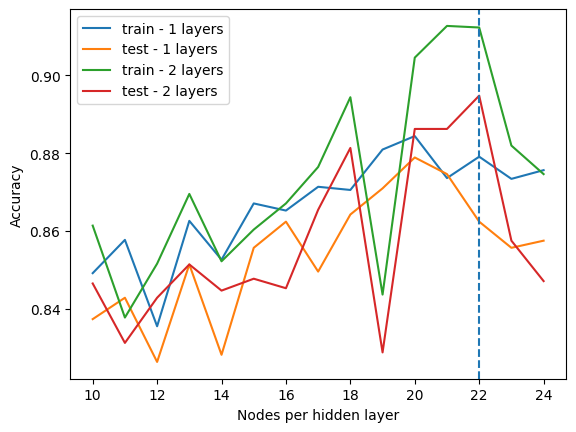

In [48]:
plt.figure()
size = len(num_nodes)
for (i, l) in enumerate(num_layers):
    plt.plot(num_nodes, results_train[i*size:(i+1)*size], label=f"train - {l} layers")
    plt.plot(num_nodes, results_test[i*size:(i+1)*size], label=f"test - {l} layers")
plt.axvline(x=num_nodes[best % size], linestyle='--')
plt.xlabel('Nodes per hidden layer')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

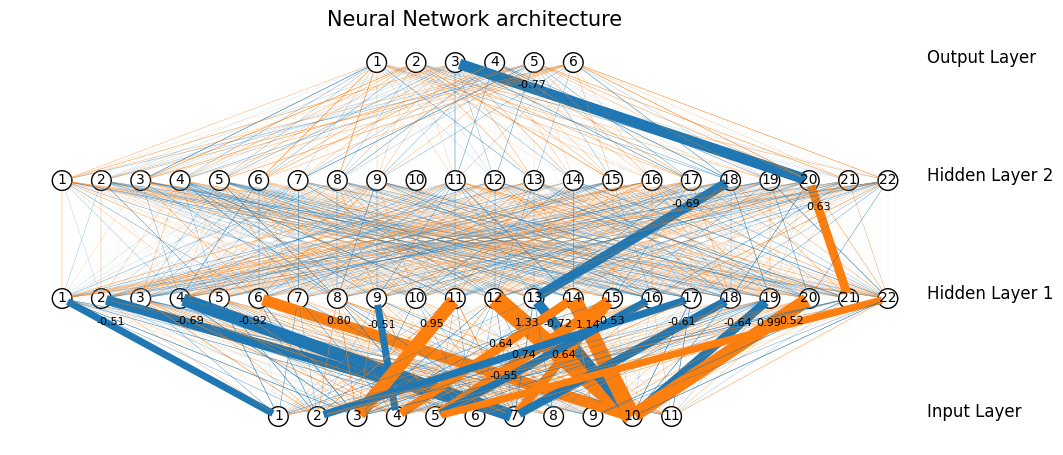

In [49]:
network_structure = np.concatenate(([pipelines[best].n_features_in_], np.asarray(pipelines[best].hidden_layer_sizes), [pipelines[best].n_outputs_]))
network=VisNN.DrawNN(network_structure, pipelines[best].coefs_)
network.draw()

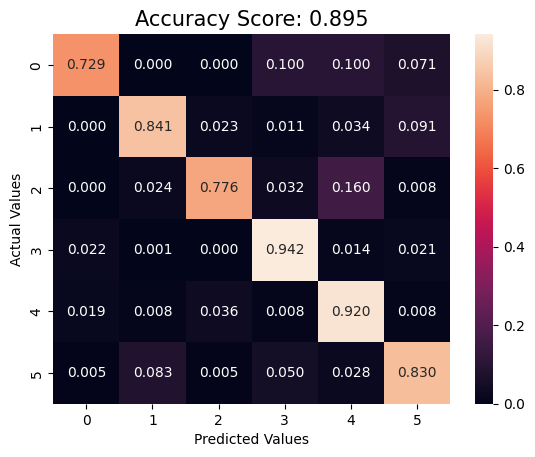

In [50]:
predictions = pipelines[best].predict(x_test)
score = round(accuracy_score(y_test, predictions), 3)
cm1 = cm(y_test, predictions, normalize='true')
sns.heatmap(cm1, annot=True, fmt=".3f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

In [51]:
results_train = []
results_test = []
pipelines = []
num_layers = list(range(1, 4))
num_nodes = list(range(200, 350, 20))

In [52]:
for l in num_layers:
    for n in num_nodes:
        print(f'Training model with {l} hidden layer(s) of {n} nodes')
        exported_pipeline = MLPClassifier(hidden_layer_sizes=(n,) * l, random_state=1)
        exported_pipeline.fit(x_train, y_train)

        results_train.append(exported_pipeline.score(x_train, y_train))
        results_test.append(exported_pipeline.score(x_test, y_test))
        pipelines.append(exported_pipeline)

Training model with 1 hidden layer(s) of 200 nodes
Training model with 1 hidden layer(s) of 220 nodes
Training model with 1 hidden layer(s) of 240 nodes
Training model with 1 hidden layer(s) of 260 nodes
Training model with 1 hidden layer(s) of 280 nodes
Training model with 1 hidden layer(s) of 300 nodes
Training model with 1 hidden layer(s) of 320 nodes
Training model with 1 hidden layer(s) of 340 nodes
Training model with 2 hidden layer(s) of 200 nodes
Training model with 2 hidden layer(s) of 220 nodes
Training model with 2 hidden layer(s) of 240 nodes
Training model with 2 hidden layer(s) of 260 nodes
Training model with 2 hidden layer(s) of 280 nodes
Training model with 2 hidden layer(s) of 300 nodes
Training model with 2 hidden layer(s) of 320 nodes
Training model with 2 hidden layer(s) of 340 nodes
Training model with 3 hidden layer(s) of 200 nodes
Training model with 3 hidden layer(s) of 220 nodes
Training model with 3 hidden layer(s) of 240 nodes
Training model with 3 hidden la

In [53]:
best = results_test.index(max(results_test))
print(f"Score of best model: {results_test[best]}")
print(f"Best choice for layers: {len(pipelines[best].hidden_layer_sizes)}")
print(f"Best choice for nodes: {pipelines[best].hidden_layer_sizes[0]}")

Score of best model: 0.9290519877675841
Best choice for layers: 2
Best choice for nodes: 260


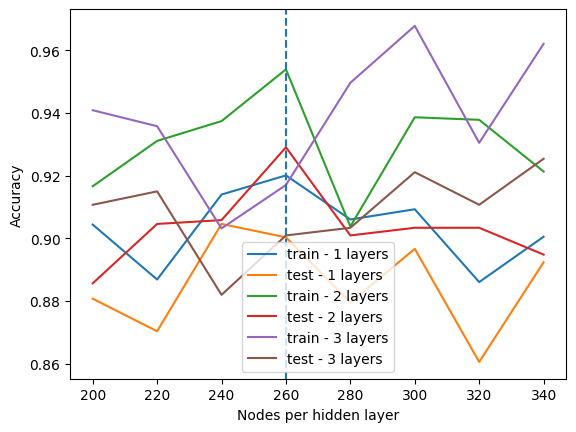

In [54]:
plt.figure()
size = len(num_nodes)
for (i, l) in enumerate(num_layers):
    plt.plot(num_nodes, results_train[i*size:(i+1)*size], label=f"train - {l} layers")
    plt.plot(num_nodes, results_test[i*size:(i+1)*size], label=f"test - {l} layers")
plt.axvline(x=num_nodes[best % size], linestyle='--')
plt.xlabel('Nodes per hidden layer')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

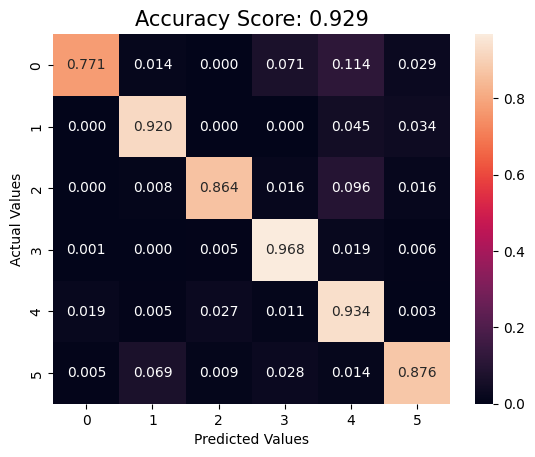

In [55]:
predictions = pipelines[best].predict(x_test)
score = round(accuracy_score(y_test, predictions), 3)
cm1 = cm(y_test, predictions, normalize='true')
sns.heatmap(cm1, annot=True, fmt=".3f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

In [58]:
with open('model-neural-network.joblib', 'wb') as f:
    joblib.dump(pipelines[best], f)